Attribution 4.0 International (CC BY 4.0)

https://creativecommons.org/licenses/by/4.0/

https://en.wikipedia.org/wiki/S.M.A.R.T.#Known_ATA_S.M.A.R.T._attributes

In [1]:
import pandas
import sys
print(sys.version_info)
print('pandas',pandas.__version__)
import glob
import pickle
import numpy
import time
import matplotlib.pyplot as plt

sys.version_info(major=3, minor=6, micro=6, releaselevel='final', serial=0)
pandas 0.23.4


In [2]:
df_header_only=pandas.read_csv('zipped_data/data_Q2_2018.zip_folder/2018-04-01.csv',nrows=3)
nonsmart_cols=[]
for colname in df_header_only.columns:
    if 'smart_' not in colname:
        nonsmart_cols.append(colname)

In [3]:
nonsmart_cols.append('smart_241_raw') # written
nonsmart_cols.append('smart_242_raw') # read
nonsmart_cols.append('smart_9_raw') # power-on hours
nonsmart_cols.remove('capacity_bytes')

In [4]:
list_of_csvs = glob.glob('zipped_data/**/*.csv', recursive=True)
len(list_of_csvs)

2092

In [5]:
start_time=time.time()
list_of_df=[]
for csv_file in list_of_csvs:
    df=pandas.read_csv(csv_file,nrows=2)
    if 'smart_241_raw' in df.columns:
        df=pandas.read_csv(csv_file,usecols=nonsmart_cols)
        df = df[df['failure']==1]
        list_of_df.append(df)
print('elapsed:',time.time()-start_time,'seconds')

elapsed: 470.93148732185364 seconds


In [6]:
df = pandas.concat(list_of_df)
print(df.shape)
#df.dropna(how='any',inplace=True)
#print(df.shape)
#df.head()

(8743, 7)


# LBA read/written versus power-on hours

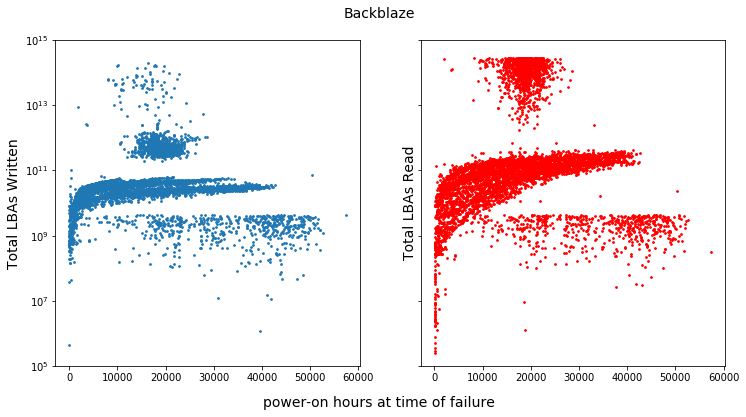

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12, 6))
ax1.scatter(x=df['smart_9_raw'],y=df['smart_241_raw'],s=3)
ax1.set_ylabel('Total LBAs Written',fontsize=14)
ax1.set_yscale('log')

ax2.scatter(x=df['smart_9_raw'],y=df['smart_242_raw'],color='r',s=3)
ax2.set_ylabel('Total LBAs Read',fontsize=14);
plt.ylim([100000,1000000000000000])
ax2.set_yscale('log')

f.text(0.5, 0.04, 'power-on hours at time of failure', ha='center', va='center',fontsize=14);
f.text(0.5, 0.94, 'Backblaze', ha='center', va='center',fontsize=14);

## zoom in to the "low LBA read/written" range of values

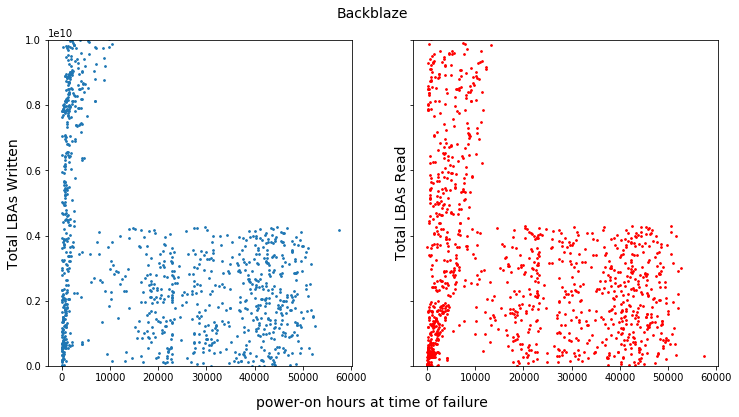

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12, 6))
ax1.scatter(x=df['smart_9_raw'],y=df['smart_241_raw'],s=3)
ax1.set_ylabel('Total LBAs Written',fontsize=14)
ax2.scatter(x=df['smart_9_raw'],y=df['smart_242_raw'],color='r',s=3)
ax2.set_ylabel('Total LBAs Read',fontsize=14);
plt.ylim([0,10000000000])
f.text(0.5, 0.04, 'power-on hours at time of failure', ha='center', va='center',fontsize=14);
f.text(0.5, 0.94, 'Backblaze', ha='center', va='center',fontsize=14);

## zoom out to the "medium LBA read/written" range of values

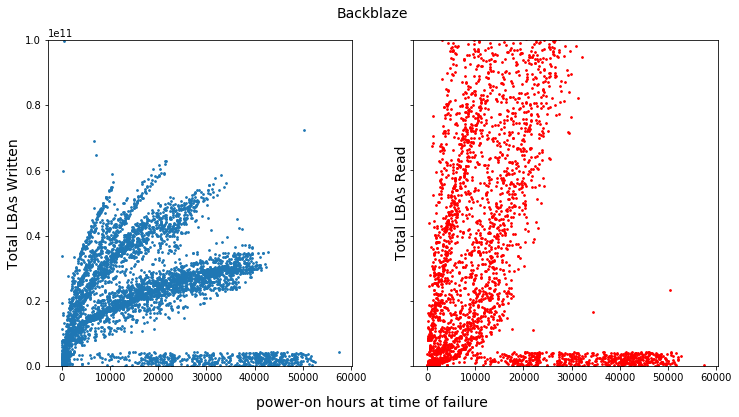

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12, 6))
ax1.scatter(x=df['smart_9_raw'],y=df['smart_241_raw'],s=3)
ax1.set_ylabel('Total LBAs Written',fontsize=14)
ax2.scatter(x=df['smart_9_raw'],y=df['smart_242_raw'],color='r',s=3)
ax2.set_ylabel('Total LBAs Read',fontsize=14);
plt.ylim([0,100000000000])
f.text(0.5, 0.04, 'power-on hours at time of failure', ha='center', va='center',fontsize=14);
f.text(0.5, 0.94, 'Backblaze', ha='center', va='center',fontsize=14);

## zoom out again to the "high LBA read/written" range of values

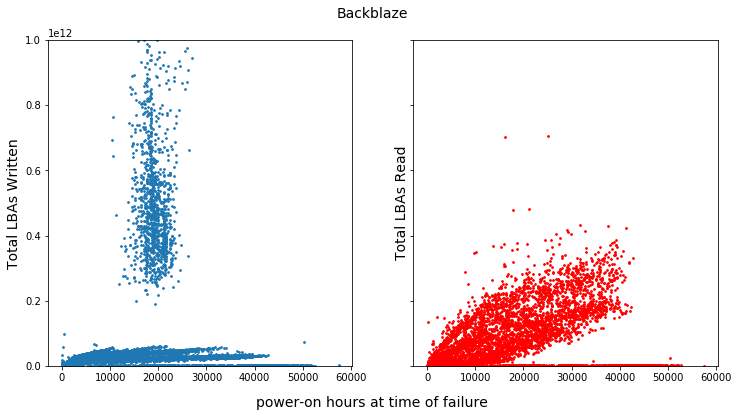

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12, 6))
ax1.scatter(x=df['smart_9_raw'],y=df['smart_241_raw'],s=3)
ax1.set_ylabel('Total LBAs Written',fontsize=14)
ax2.scatter(x=df['smart_9_raw'],y=df['smart_242_raw'],color='r',s=3)
ax2.set_ylabel('Total LBAs Read',fontsize=14);
plt.ylim([0,1000000000000])
f.text(0.5, 0.04, 'power-on hours at time of failure', ha='center', va='center',fontsize=14);
f.text(0.5, 0.94, 'Backblaze', ha='center', va='center',fontsize=14);

## max range for y-axis

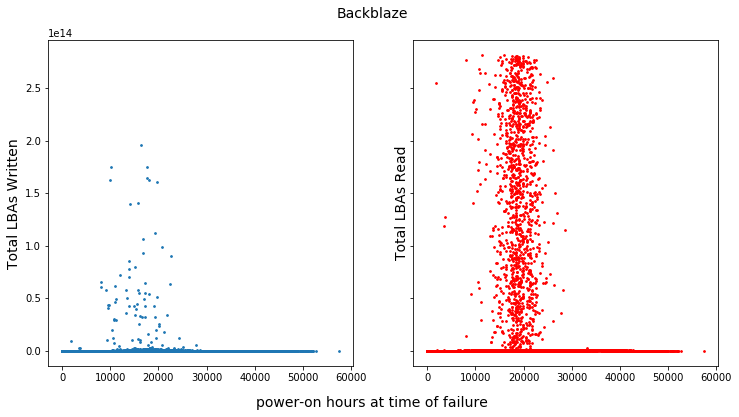

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12, 6))
ax1.scatter(x=df['smart_9_raw'],y=df['smart_241_raw'],s=3)
ax1.set_ylabel('Total LBAs Written',fontsize=14)
ax2.scatter(x=df['smart_9_raw'],y=df['smart_242_raw'],color='r',s=3)
ax2.set_ylabel('Total LBAs Read',fontsize=14);
f.text(0.5, 0.04, 'power-on hours at time of failure', ha='center', va='center',fontsize=14);
f.text(0.5, 0.94, 'Backblaze', ha='center', va='center',fontsize=14);

# per model

In [68]:
def make_plot_per_model(drive_model):
    
    if not (df[df['model']==drive_model]['smart_241_raw'].isnull().all()):
        f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12, 6))
        ax1.scatter(x=df[df['model']==drive_model]['smart_9_raw'],y=df[df['model']==drive_model]['smart_241_raw'],
                    s=3,label=drive_model)
        ax1.set_ylabel('Total LBAs Written',fontsize=14)
        ax1.set_yscale('log')

        ax2.scatter(x=df[df['model']==drive_model]['smart_9_raw'],y=df[df['model']==drive_model]['smart_242_raw'],color='r',
                    s=3,label=drive_model)
        ax2.set_ylabel('Total LBAs Read',fontsize=14);
        plt.ylim([100000,1000000000000000])
        ax2.set_yscale('log')

        f.text(0.5, 0.04, 'power-on hours at time of removal', ha='center', va='center',fontsize=14);
        f.text(0.5, 0.94, 'Backblaze: '+drive_model, ha='center', va='center',fontsize=14);

(3457, 7)


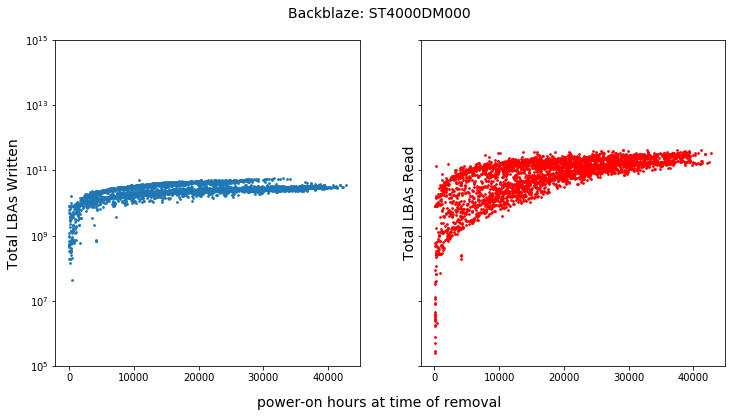

In [69]:
drive_model='ST4000DM000'
print(df[df['model']==drive_model].shape)
make_plot_per_model(drive_model)

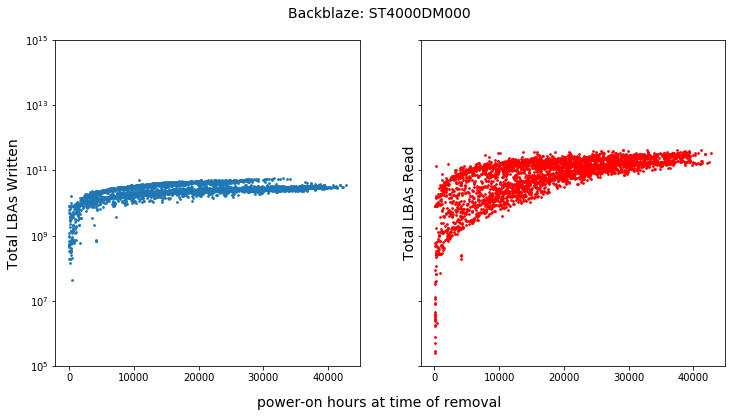

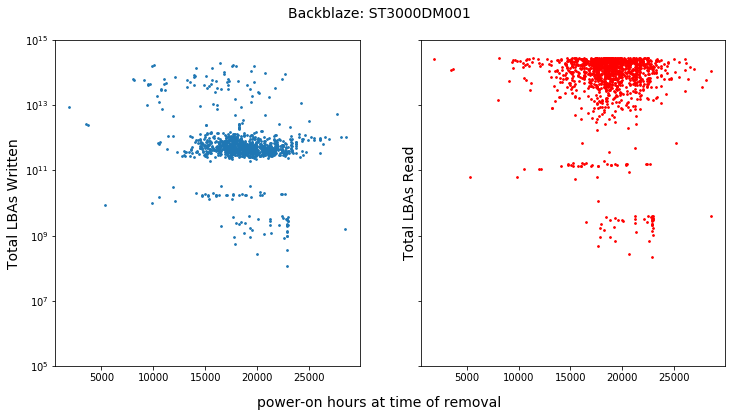

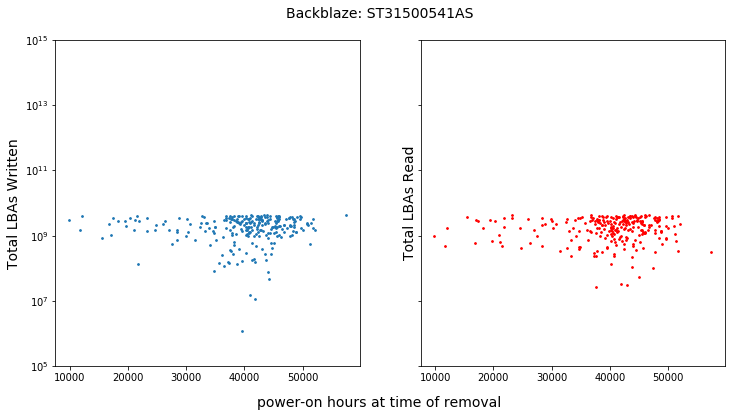

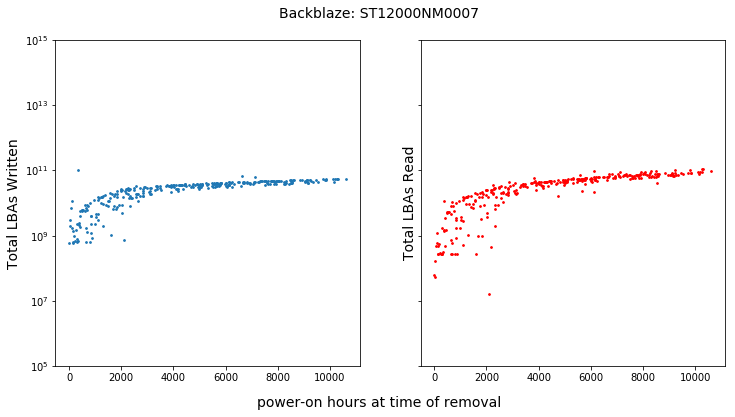

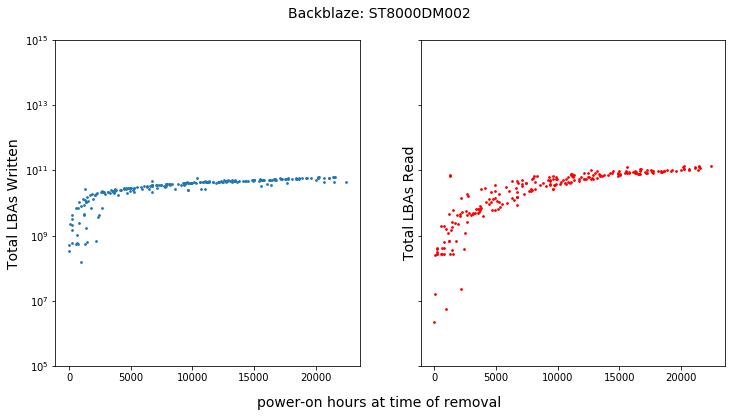

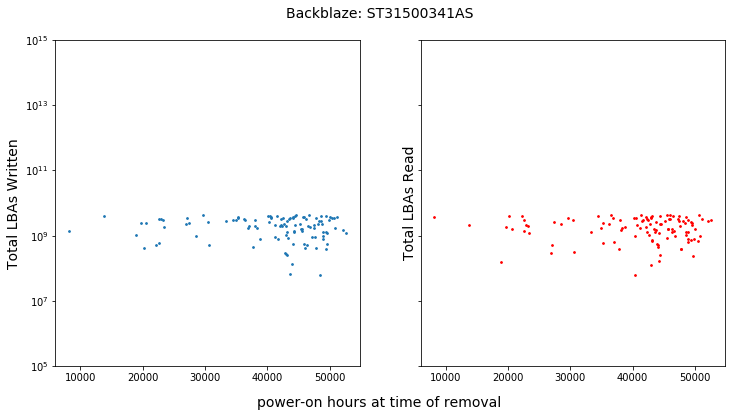

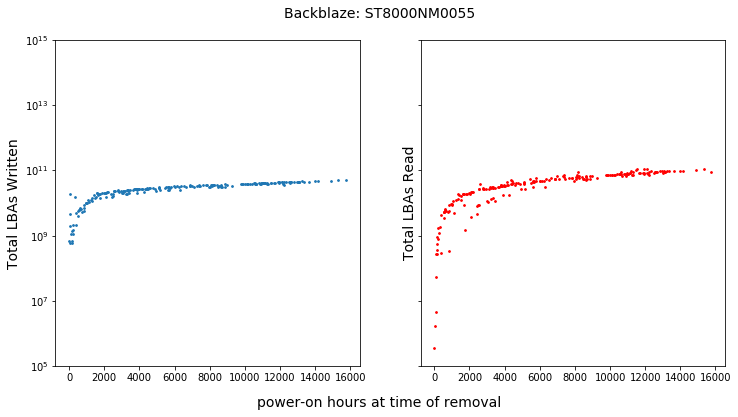

In [70]:
ser = df['model'].value_counts()
for drive_model in ser[ser>100].index: # only show results if there are more than 100 instances of that drive model being removed
    make_plot_per_model(drive_model)